In [25]:
from src.modules.models import *
from sklearn.model_selection import train_test_split

In [26]:
EXPLIQUEE = "unit_price" #"type" => Classification ou "unit_price" => Regression
if EXPLIQUEE == "type":
    CATEGORICALS = ["cepage", "par_gouts", "service", "country"]
    MODE = "classification"
elif EXPLIQUEE == "unit_price":
    CATEGORICALS = ["cepage", "par_gouts", "service", "country", "type"]
    MODE = "regression"

In [ ]:
df = data_model(chemin= "./data/vins.json",
                variable_a_predire= EXPLIQUEE)

In [ ]:
df = df.select("capacity", "unit_price","millesime", "cepage", "par_gouts",
          "service", "avg_temp", "conservation_date", "bio", "customer_fav", 
          "is_new", "top_100", "destock", "sulphite_free", "alcohol_volume",
          "country", "bubbles", "wine_note", "nb_reviews", "conservation_time","type")

In [ ]:
df = prep_str(df, categorical_cols=CATEGORICALS)

In [ ]:
X = df.drop(columns=[EXPLIQUEE])
y = df[EXPLIQUEE]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
X_test

NameError: name 'X_test' is not defined

In [92]:
#model = train_model(X_train, y_train, MODE)

In [93]:
#model_result(knn=model["model_knn"],svm=model["model_svm"],mlp=model["model_mlp"],
#             rf=model["model_rf"],boost=model["model_boost"],ridge=model["model_ridge"])

stockage_result_csv(model, MODE)

In [106]:
model = Pipeline(
            [
                ("imputation", SimpleImputer()),
                ("echelle", MinMaxScaler()),
                ("entrainement", RandomForestRegressor(max_depth=9, n_estimators=30)),
            ])
model.fit(X_train, y_train)

Pipeline(steps=[('imputation', SimpleImputer()), ('echelle', MinMaxScaler()),
                ('entrainement',
                 RandomForestRegressor(max_depth=9, n_estimators=30))])

In [140]:
model.predict([X_test.loc[1089]])

c:\Users\guill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([13.76474446])

In [146]:
index = y_test.index[1]
model.predict([X_test.loc[index]])

c:\Users\guill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([18.42358353])

In [95]:
model = model.named_steps["entrainement"]
importances = model.feature_importances_

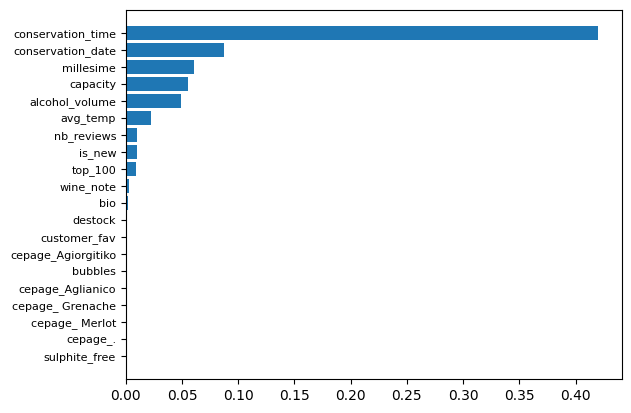

In [96]:
import matplotlib.pyplot as plt
importances = importances[0:20]
indices = np.argsort(importances)
fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices], fontsize = 8)

In [11]:
import polars as pl
import ast

In [14]:
def recup_param(choix):
    csv = pl.read_csv("./data/result_ml_save.csv")
    csv = csv.filter(csv['Mode'] == "regression")
    return ast.literal_eval(csv.filter(csv["Modèle"] == choix)["Paramètres"][0])

In [17]:
recup_param("Random Forest")

{'entrainement__max_depth': 9,
 'entrainement__n_estimators': 30,
 'imputation__strategy': 'most_frequent'}

In [13]:
csv = pl.read_csv("./data/result_ml_save.csv")
csv = csv.filter(csv['Mode'] == "regression")
ast.literal_eval(csv.filter(csv["Modèle"] == "Random Forest")["Paramètres"][0])["entrainement__max_depth"]

9